## Generate a simple example of Match Filter in Julia

A matched filter is designed to maximize the signal-to-noise ratio (SNR) in the presence of noise, making it easier to detect specific signals in a noisy environment. Below, I'll provide a simple example of how to implement a matched filter in Julia. The example will include generating a noisy signal and then applying a matched filter to detect a known waveform within that signal.

### Example Scenario:

1. **Create a known signal waveform** (e.g., a simple pulse).
2. **Add white noise** to simulate a noisy environment.
3. **Implement a matched filter** using the known waveform.
4. **Apply the matched filter** to detect the signal in the noisy data.

First, you'll need to have Julia installed. If you haven’t done so, you can download and install it from [julialang.org](https://julialang.org/downloads/).

### Steps and Julia Code:

**Step 1: Install Required Packages**
```julia
using Pkg
Pkg.add("Plots")
```

**Step 2: Generate a Known Signal and Add Noise**


In [1]:
using Plots

In [2]:
# Parameters
fs = 1000 # Sampling frequency
t = 0:1/fs:1; # Time vector

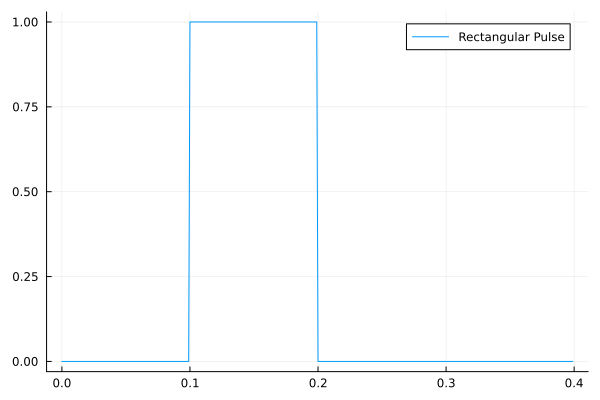

In [3]:
# Known signal (e.g., a simple rectangular pulse)
pulse_length = 100
pulse = [1.0 for _ in 1:pulse_length]
signal = [zeros(Float64, pulse_length); pulse; zeros(Float64, 2*pulse_length)]; # zero-padding before and after

plot(t[1:length(signal)], signal, label=" Rectangular Pulse", legend=:topright)

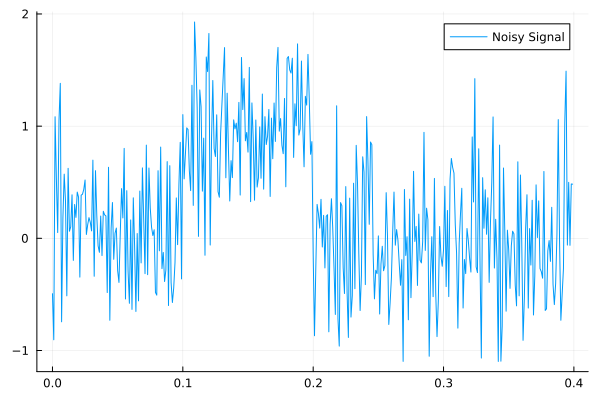

In [4]:
# Add noise
noise = randn(length(signal)) * 0.5 # Gaussian noise
noisy_signal = signal + noise

plot(t[1:length(noisy_signal)], noisy_signal, label="Noisy Signal", legend=:topright)

**Step 3: Implement and Apply the Matched Filter**


In [1]:
using DSP
using FFTW
using LinearAlgebra

In [2]:
include("operations.jl")

norm (generic function with 14 methods)

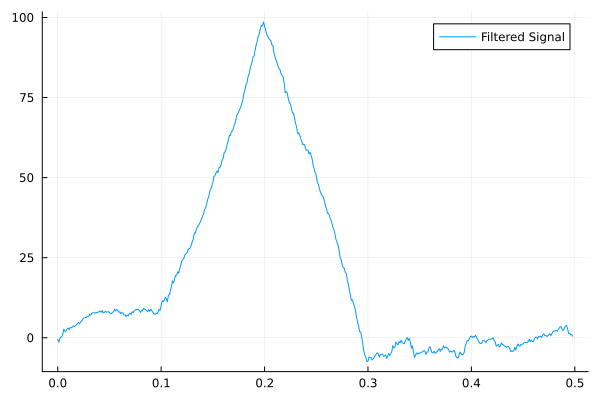

In [6]:
# Matched filter is the time-reverse of the original signal pulse
matched_filter = reverse(pulse)

# Convolve the noisy signal with the matched filter
filtered_signal = conv(noisy_signal, matched_filter)

# Plotting the filtered signal
t_conv = 0:1/fs:(length(filtered_signal)-1)/fs
plot(t_conv, filtered_signal, label="Filtered Signal", legend=:topright)

### Explanation:

1. **Creating the Pulse and Noise**: The code creates a rectangular pulse and adds Gaussian noise to it, simulating a noisy environment.

2. **Matched Filter Implementation**: The matched filter is simply the time-reversed version of the pulse. Convolution of the noisy signal with this filter maximizes the SNR at the point where the original pulse shape appears in the noisy signal.

3. **Plotting the Results**: The plots help visualize the noisy signal and the output of the matched filter, showing how the signal peak becomes prominent after filtering.

This simple example demonstrates how to detect a known signal in noisy data using a matched filter in Julia. For a real application, you'd adjust the pulse shape, filter design, and parameters according to specific requirements and characteristics of the signal and noise in your actual scenario.

In [7]:
using Plots
using DSP
using Statistics

In [8]:


# Generate a simple signal
fs = 1000  # Sampling frequency
t = 0:1/fs:1-1/fs  # Time vector
signal = zeros(length(t))
signal[fs÷4:fs÷3] .= 1  # A simple rectangular pulse

# Add white Gaussian noise
noise_power = 0.01
noise = sqrt(noise_power) * randn(length(t))
noisy_signal = signal .+ noise

# Apply the matched filter (which is just the time-reversed signal in this case)
matched_filter = reverse(signal);


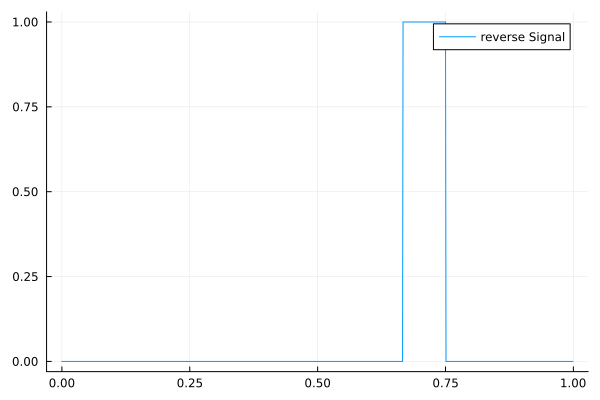

In [9]:
plot(t, matched_filter, label="reverse Signal")

SNR before filtering: 9.119284088468437 dB
SNR after filtering: 7.384489789754008 dB


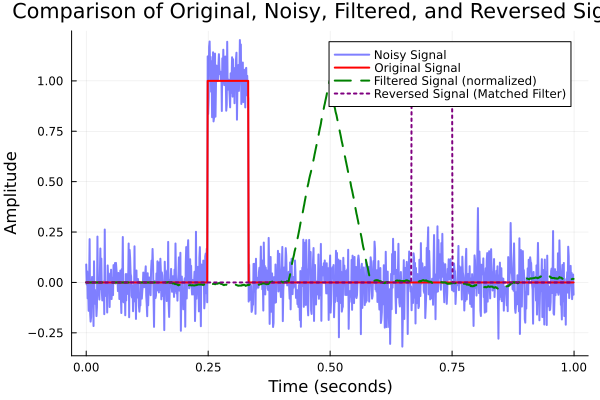

In [10]:
using Plots
using DSP

# Generate a simple signal
fs = 1000  # Sampling frequency
t = 0:1/fs:1-1/fs  # Time vector
signal = zeros(length(t))
signal[fs÷4:fs÷3] .= 1  # A simple rectangular pulse

# Add white Gaussian noise
noise_power = 0.01
noise = sqrt(noise_power) * randn(length(t))
noisy_signal = signal .+ noise

# Apply the matched filter (which is just the time-reversed signal in this case)
matched_filter = reverse(signal)
filtered_signal = conv(noisy_signal, matched_filter)

# Correctly adjust the length of the filtered signal to match the input signal length
# Take the center part of the convolution output
start_index = ceil(Int, (length(filtered_signal) - length(t)) / 2) + 1
end_index = start_index + length(t) - 1
filtered_signal = filtered_signal[start_index:end_index]

# Normalize the filtered signal
normalized_filtered_signal = filtered_signal / maximum(abs.(filtered_signal))

# Function to calculate SNR
function calculate_snr(signal, noise)
    signal_power = mean(signal.^2)
    noise_power = mean(noise.^2)
    10 * log10(signal_power / noise_power)
end

# Calculate SNR before and after filtering
snr_before = calculate_snr(signal, noise)
snr_after = calculate_snr(normalized_filtered_signal, noise)

println("SNR before filtering: $(snr_before) dB")
println("SNR after filtering: $(snr_after) dB")

# Superposed Plotting including the reversed signal
plot(t, noisy_signal, label="Noisy Signal", color=:blue, alpha=0.5, linewidth=2)
plot!(t, signal, label="Original Signal", color=:red, linewidth=2)
plot!(t, normalized_filtered_signal, label="Filtered Signal (normalized)", color=:green, linewidth=2, linestyle=:dash)
plot!(t, matched_filter, label="Reversed Signal (Matched Filter)", color=:purple, linestyle=:dot, linewidth=2)
title!("Comparison of Original, Noisy, Filtered, and Reversed Signals")
xlabel!("Time (seconds)")
ylabel!("Amplitude")
# legend!(:topright)
